## Day 14 Logistic Regression Visualization
24/Dec/2021 Friday

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Data Generation

In [2]:
n = 200
X1 = np.random.multivariate_normal([3,2], [[1, 2], [2, 1]], size= n) # y=1 class
X2 = np.random.multivariate_normal([7,9], [[1, 3], [3, 1]], size= n) # y=0 class

y1 = np.ones((n,))
y2 = np.zeros((n,))
print(X1.shape, X2.shape, y1.shape, y2.shape)

X = np.concatenate([X1, X2], axis=0)
y = np.concatenate([y1, y2], axis=0)

print(X.shape, y.shape)

ix = np.arange(0, len(X))
np.random.shuffle(ix)

X = X[ix]
y = y[ix]

(200, 2) (200, 2) (200,) (200,)
(400, 2) (400,)


<ipython-input-2-5c16799fd920>:2: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal([3,2], [[1, 2], [2, 1]], size= n) # y=1 class
<ipython-input-2-5c16799fd920>:3: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal([7,9], [[1, 3], [3, 1]], size= n) # y=0 class


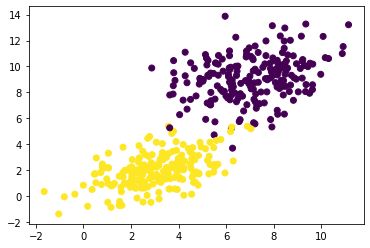

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [77]:
class LogisticRegression:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return self.sigmoid(X.dot(self.w))
    
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    def loss(self, ytrue, ypred):
        return -(ytrue*np.log(ypred + 1e-7) + (1-ytrue)*np.log(1-ypred+1e-7)).sum()
    
    def accuracy(self, ytrue, ypred):
         return (ytrue == (ypred > 0.5).astype('int')).mean()
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        parameters = [self.w]
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            parameters.append(self.w)
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            acc = self.accuracy(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, accuracy: {acc}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses, parameters
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)

In [5]:
logr = LogisticRegression()
losses = logr.fit(X, y.reshape(-1,1), epochs=300, learning_rate=0.01, method='batch')

Epoch: 1/300 Loss: 3104.3218233296916, accuracy: 0.5125, SoR: 195.22852325163808
Epoch: 2/300 Loss: 3048.1900336008007, accuracy: 0.515, SoR: 193.4925959993044
Epoch: 3/300 Loss: 2570.6779166225306, accuracy: 0.535, SoR: 186.637783229192
Epoch: 4/300 Loss: 305.8359697433239, accuracy: 0.845, SoR: -9.306546265364148
Epoch: 5/300 Loss: 885.7639606023383, accuracy: 0.7125, SoR: 119.39352120315942
Epoch: 6/300 Loss: 2225.523533269735, accuracy: 0.545, SoR: -172.7809122348522
Epoch: 7/300 Loss: 3018.628988072068, accuracy: 0.525, SoR: 190.2534486698972
Epoch: 8/300 Loss: 2677.769309719549, accuracy: 0.54, SoR: 183.73651705049036
Epoch: 9/300 Loss: 954.8587466827817, accuracy: 0.75, SoR: 100.17083665368756
Epoch: 10/300 Loss: 457.420666778757, accuracy: 0.85, SoR: -14.31954965422153
Epoch: 11/300 Loss: 622.1859823362336, accuracy: 0.8, SoR: 77.35674492317003
Epoch: 12/300 Loss: 457.8239291099138, accuracy: 0.845, SoR: -20.165863433444613
Epoch: 13/300 Loss: 720.1172740101908, accuracy: 0.782

Epoch: 168/300 Loss: 14.679053840201995, accuracy: 0.9825, SoR: -2.2733500385534438
Epoch: 169/300 Loss: 14.846718213945222, accuracy: 0.98, SoR: 2.086304948246856
Epoch: 170/300 Loss: 14.650594490796744, accuracy: 0.9825, SoR: -2.225384944609867
Epoch: 171/300 Loss: 14.80742452926911, accuracy: 0.98, SoR: 2.0335765950604054
Epoch: 172/300 Loss: 14.624433149661446, accuracy: 0.9825, SoR: -2.180403543400475
Epoch: 173/300 Loss: 14.771563089680336, accuracy: 0.98, SoR: 1.9843220876502845
Epoch: 174/300 Loss: 14.600375287165566, accuracy: 0.9825, SoR: -2.138245271027297
Epoch: 175/300 Loss: 14.738811178090703, accuracy: 0.98, SoR: 1.9383344504196138
Epoch: 176/300 Loss: 14.578245479486306, accuracy: 0.9825, SoR: -2.0987598341231646
Epoch: 177/300 Loss: 14.708881395400622, accuracy: 0.98, SoR: 1.8954218098375075
Epoch: 178/300 Loss: 14.557885456331721, accuracy: 0.9825, SoR: -2.061806631392004
Epoch: 179/300 Loss: 14.681517566145295, accuracy: 0.98, SoR: 1.855406296818298
Epoch: 180/300 Lo

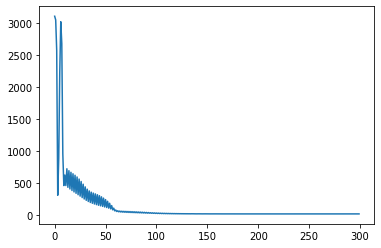

In [6]:
# plt.figure(dpi=300)
plt.plot(losses)
plt.show()

In [7]:
logr.w

array([[17.89734466],
       [-0.5045684 ],
       [-2.81408994]])

In [8]:
ypred = logr.predict(X)
ypred[:10]

array([[9.99999927e-01],
       [9.73155683e-01],
       [6.73793810e-04],
       [9.99999444e-01],
       [9.99999672e-01],
       [3.78276906e-07],
       [9.19349781e-01],
       [9.90822344e-01],
       [9.99975830e-01],
       [9.99997387e-01]])

In [53]:
logr.accuracy(y.reshape(-1,1), ypred)

0.9925

In [9]:
X.shape

(400, 2)

In [16]:
def Z(X, w):
    if w.shape[0] != X.shape[1]:
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
    return X.dot(w)  

In [17]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)

f1, f2 = np.meshgrid(f1, f2)

f1, f2 = f1.reshape(-1,1), f2.reshape(-1,1)
print(f1.shape, f2.shape)

x = np.concatenate([f1, f2], axis=1)
print(x.shape)

(2500, 1) (2500, 1)
(2500, 2)


In [18]:
w = logr.w
w

array([[17.89734466],
       [-0.5045684 ],
       [-2.81408994]])

In [20]:
z = Z(x, w)
print(z.shape)

(2500, 1)


In [27]:
sigma = 1/(1+np.e**-z)
print(sigma.shape)

(2500, 1)


In [30]:
sigma.min(), sigma.max()

(2.3562369915026195e-12, 0.9999999998528359)

In [33]:
%matplotlib qt
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], c=y, label="Training data" )
# ax.scatter(f1, f2, z, c=z, cmap=plt.cm.coolwarm, s=5, alpha=0.5, label="Z")
ax.scatter(f1, f2, sigma, c=sigma, cmap=plt.cm.coolwarm, s=5, alpha=0.5, label="sigmoid(z)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Z (=X.W)")
plt.legend()
plt.show()

## Visualize Loss

In [67]:
C = np.linspace(-10, 10, 100)
M1 = np.linspace(-10, 10, 100)

M1, C = np.meshgrid(M1, C)

M1, C  = M1.reshape(-1,1), C.reshape(-1,1)

In [68]:
print(M1.shape, C.shape)

(10000, 1) (10000, 1)


## Generating 1-d Data 

In [43]:
x1 = 3 + np.random.randn(50) # N(3, 1)
y1 = np.ones((len(x1),))

x2 = 9 + np.random.randn(50) # N(9, 1)
y2 = np.zeros((len(x2),))
print(x1.shape, y1.shape, x2.shape, y2.shape)

x = np.concatenate([x1,x2], axis=0)
print(x.shape)

y = np.concatenate([y1,y2], axis=0)
print(y.shape)

ix = np.arange(0, len(x))
np.random.shuffle(ix)

x = x[ix]
y = y[ix]

(50,) (50,) (50,) (50,)
(100,)
(100,)


In [45]:
x.shape, y.shape

((100,), (100,))

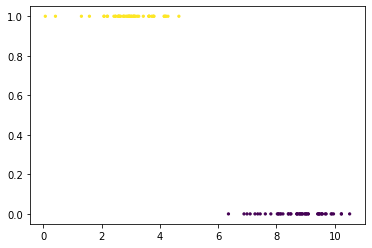

In [48]:
%matplotlib inline
plt.scatter(x, y, s=5, c=y)
plt.show()

In [69]:
def loss(x, y, C, M1):
    losses = []
    for c, m1 in zip(C,M1): 
        z = c + m1*x
        ypred = 1/(1+np.e**-z)
        loss = -(y*np.log(ypred + 1e-7) + (1-y)*np.log(1-ypred+1e-7)).sum()
        losses.append(loss)
    return np.array(losses)

L = loss(x, y, C, M1) 
print(L.shape)    

(10000,)


In [ ]:
%matplotlib inline
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(C, M1, L, c=L, cmap=plt.cm.coolwarm, alpha=0.5, s=5)

ax.set_xlabel("C (bias)")
ax.set_ylabel("M1 (slope 1)")
ax.set_zlabel("L, Loss")
plt.show()

In [72]:
# Plot surface
L_ = L.reshape(100,-1)
C_ = C.reshape(100,-1)
M1_ = M1.reshape(100,-1)
print(L_.shape, M1_.shape, C_.shape)

(100, 100) (100, 100) (100, 100)


In [76]:
%matplotlib qt
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(C_, M1_, L_, cmap=plt.cm.coolwarm, alpha=0.7)

ax.set_xlabel("C (bias)")
ax.set_ylabel("M1 (slope 1)")
ax.set_zlabel("L, Loss")
plt.show()

### Visualizing Gradient Descent 

In [107]:
logr = LogisticRegression()
losses, parameters = logr.fit(x.reshape(-1,1), y.reshape(-1,1), epochs=50, learning_rate=0.0025, method='batch')


Epoch: 1/50 Loss: 88.80683794092752, accuracy: 0.52, SoR: 40.2494174781554
Epoch: 2/50 Loss: 54.793855631194326, accuracy: 0.53, SoR: 28.290686714063433
Epoch: 3/50 Loss: 49.01723526031402, accuracy: 0.76, SoR: 12.527450918892058
Epoch: 4/50 Loss: 48.16947897716634, accuracy: 0.58, SoR: 20.034273244522655
Epoch: 5/50 Loss: 47.22181666154918, accuracy: 0.75, SoR: 14.03786885194159
Epoch: 6/50 Loss: 46.47878183152562, accuracy: 0.62, SoR: 18.005218061931735
Epoch: 7/50 Loss: 45.75086555867896, accuracy: 0.77, SoR: 14.733240583546051
Epoch: 8/50 Loss: 45.07840593551735, accuracy: 0.71, SoR: 16.738867014805685
Epoch: 9/50 Loss: 44.42752469411857, accuracy: 0.81, SoR: 14.976512589824821
Epoch: 10/50 Loss: 43.80071878197348, accuracy: 0.79, SoR: 15.890220007424697
Epoch: 11/50 Loss: 43.191196310609435, accuracy: 0.84, SoR: 14.948399556330218
Epoch: 12/50 Loss: 42.597860471052634, accuracy: 0.85, SoR: 15.285244785227427
Epoch: 13/50 Loss: 42.01903368113527, accuracy: 0.86, SoR: 14.76581185038

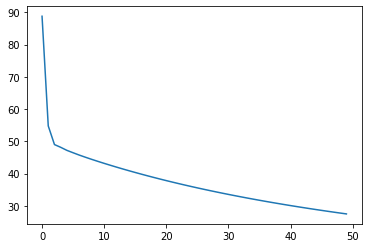

In [108]:
%matplotlib inline
plt.plot(losses)
plt.show()

In [110]:
parameters = np.array(parameters)
temp = parameters.reshape(len(parameters),-1)
temp.shape

(51, 2)

In [111]:
param1, param2 = temp[1:,0], temp[1:,1] # intercept, slope

In [112]:
param1.shape, param2.shape, len(losses)

((50,), (50,), 50)

In [113]:
%matplotlib qt
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(C_, M1_, L_, cmap=plt.cm.coolwarm, alpha=0.7)
ax.scatter(param1, param2, losses, c='black')
ax.set_xlabel("C (bias)")
ax.set_ylabel("M1 (slope 1)")
ax.set_zlabel("L, Loss")
plt.show()